Exploring the Impact of Conflict Duration and Economic Status on Solar Adoption:

In [10]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
# read dataframe from GitHup
url = "https://github.com/MIT-Emerging-Talent/ET6-CDSP-group-08-repo/raw/refs/heads/main/1_datasets/cleaned_data/UN_comtrade_clean_dataset.xlsx"
df = pd.read_excel(url, engine="openpyxl")
df.head()

,Year,Country_Code,Country,Product_Code,Product_Description,Net_Weight_kg,Value_USD,Conflict_Year
0,2019,AFG,Afghanistan,854140,"Electrical apparatus; photosensitive, includin...",7.700172e+07,89932863.97,True
1,2007,CAF,Central African Rep.,854140,"Electrical apparatus; photosensitive, includin...",1.796000e+03,26489.00,False
2,2008,CAF,Central African Rep.,854140,"Electrical apparatus; photosensitive, includin...",1.654000e+03,61941.00,False
3,2009,CAF,Central African Rep.,854140,"Electrical apparatus; photosensitive, includin...",7.822000e+03,269897.00,False
4,2010,CAF,Central African Rep.,854140,"Electrical apparatus; photosensitive, includin...",1.234600e+04,173026.00,False


In [3]:
df.shape

(1306, 8)

In [4]:
# fileter confllict year by country
conflict_years_by_country = df.groupby("Country")["Conflict_Year"].apply(
    lambda x: list(np.unique(x))
)
conflict_years_by_country

Country
Afghanistan                    [True]
Central African Rep.    [False, True]
Ethiopia                [False, True]
Germany                       [False]
Iraq                           [True]
Libya                   [False, True]
Mali                    [False, True]
Morocco                       [False]
Mozambique              [False, True]
Myanmar                 [False, True]
Nigeria                 [False, True]
Pakistan                [False, True]
Rwanda                        [False]
Saudi Arabia                  [False]
State of Palestine             [True]
Sudan                   [False, True]
Sudan (...2011)         [False, True]
Syria                         [False]
Ukraine                 [False, True]
Yemen                   [False, True]
Name: Conflict_Year, dtype: object

In [5]:
# Define GDP groups based on the provided information

# GDP groups dictionary
gdp_groups = {
    "High GDP": ["Germany", "Saudi Arabia"],
    "Medium GDP": ["Iraq", "Libya", "Morocco", "Nigeria", "Pakistan", "Ukraine"],
    "Low GDP": [
        "Afghanistan",
        "Central African Rep.",
        "Ethiopia",
        "Mali",
        "Mozambique",
        "Myanmar",
        "Rwanda",
        "State of Palestine",
        "Sudan",
        "Sudan (...2011)",
        "Syria",
        "Yemen",
    ],
}


# Create mapping from country to GDP status
def map_gdp_status(country):
    for gdp_status, countries in gdp_groups.items():
        if country in countries:
            return gdp_status
    return "Unknown"


# Apply the mapping to create a new column in the DataFrame
df["GDP_Status"] = df["Country"].apply(map_gdp_status)

df.head()

,Year,Country_Code,Country,Product_Code,Product_Description,Net_Weight_kg,Value_USD,Conflict_Year,GDP_Status
0,2019,AFG,Afghanistan,854140,"Electrical apparatus; photosensitive, includin...",7.700172e+07,89932863.97,True,Low GDP
1,2007,CAF,Central African Rep.,854140,"Electrical apparatus; photosensitive, includin...",1.796000e+03,26489.00,False,Low GDP
2,2008,CAF,Central African Rep.,854140,"Electrical apparatus; photosensitive, includin...",1.654000e+03,61941.00,False,Low GDP
3,2009,CAF,Central African Rep.,854140,"Electrical apparatus; photosensitive, includin...",7.822000e+03,269897.00,False,Low GDP
4,2010,CAF,Central African Rep.,854140,"Electrical apparatus; photosensitive, includin...",1.234600e+04,173026.00,False,Low GDP


In [6]:
# Create a new column 'Conflict_Group' based on whether a country has continuous, periodical, or no conflict years.
def get_conflict_group(row):
    country = row["Country"]
    has_true = True in conflict_years_by_country.get(country, [])
    has_false = False in conflict_years_by_country.get(country, [])

    if has_true and has_false:
        return "Periodical Conflict"
    elif has_true and not has_false:
        return "Continuous Conflict"
    else:
        return "Non-conflict"


df["Conflict_Group"] = df.apply(get_conflict_group, axis=1)
df

,Year,Country_Code,Country,Product_Code,Product_Description,Net_Weight_kg,Value_USD,Conflict_Year,GDP_Status,Conflict_Group
0,2019,AFG,Afghanistan,854140,"Electrical apparatus; photosensitive, includin...",7.700172e+07,8.993286e+07,True,Low GDP,Continuous Conflict
1,2007,CAF,Central African Rep.,854140,"Electrical apparatus; photosensitive, includin...",1.796000e+03,2.648900e+04,False,Low GDP,Periodical Conflict
2,2008,CAF,Central African Rep.,854140,"Electrical apparatus; photosensitive, includin...",1.654000e+03,6.194100e+04,False,Low GDP,Periodical Conflict
3,2009,CAF,Central African Rep.,854140,"Electrical apparatus; photosensitive, includin...",7.822000e+03,2.698970e+05,False,Low GDP,Periodical Conflict
4,2010,CAF,Central African Rep.,854140,"Electrical apparatus; photosensitive, includin...",1.234600e+04,1.730260e+05,False,Low GDP,Periodical Conflict
...,...,...,...,...,...,...,...,...,...,...
1301,2024,DEU,Germany,850440,Electrical static converters,1.535544e+08,8.618599e+09,False,High GDP,Non-conflict
1302,2024,DEU,Germany,850760,"Electric accumulators; lithium-ion, including ...",8.253820e+08,2.501392e+10,False,High GDP,Non-conflict
1303,2024,DEU,Germany,851310,"Lamps; portable, electric, designed to functio...",6.468420e+06,1.932180e+08,False,High GDP,Non-conflict
1304,2024,DEU,Germany,854142,Electrical apparatus; photosensitive semicondu...,3.539582e+06,2.925800e+07,False,High GDP,Non-conflict


Let's see the behavior of periodical conflict

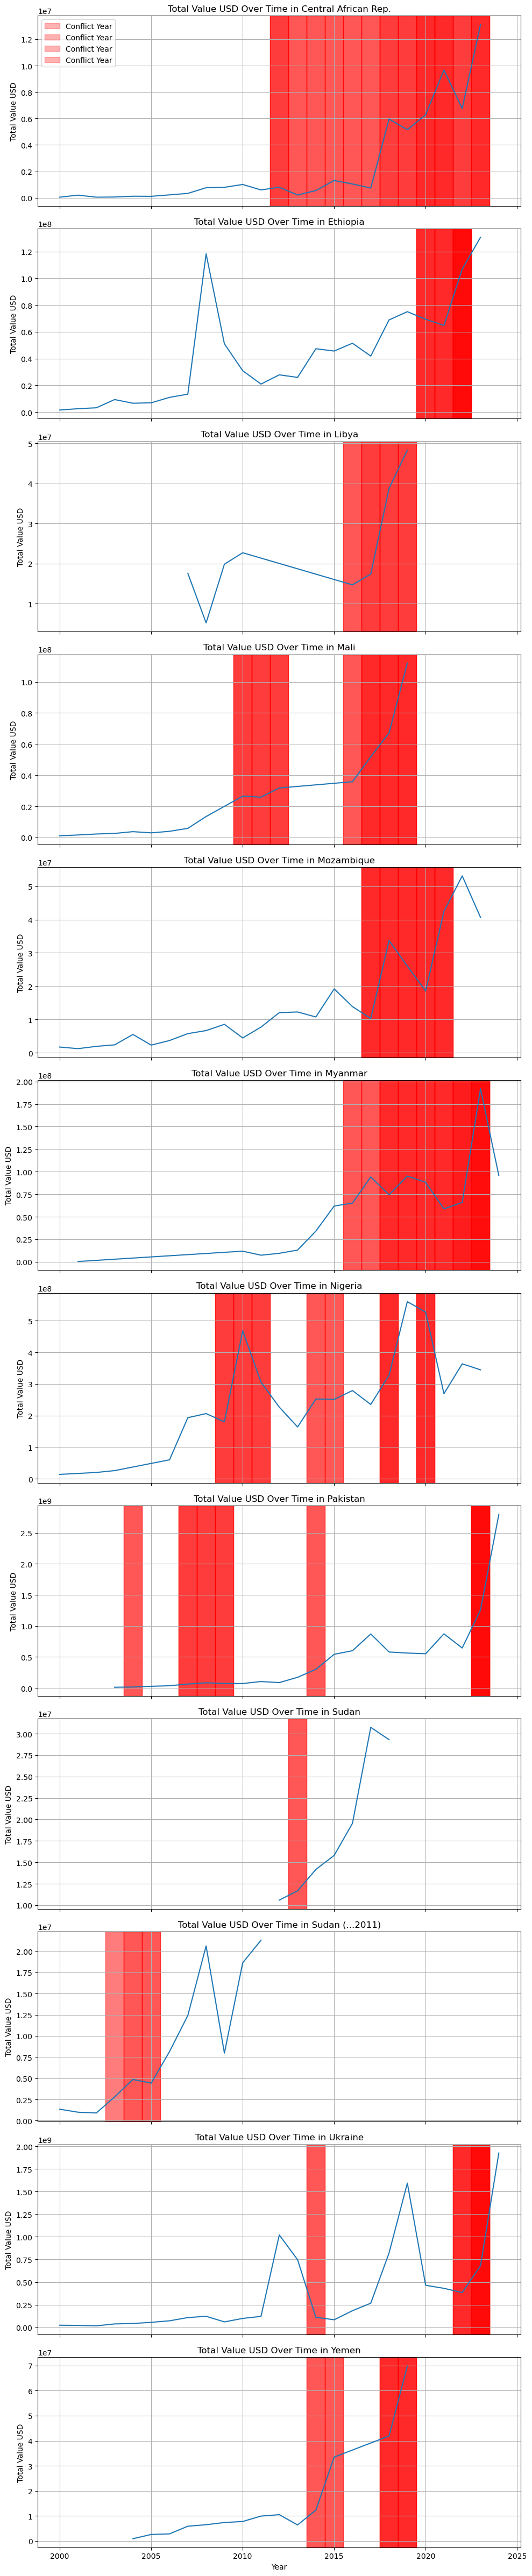

In [7]:
# Filter for Periodical Conflict countries
periodical_conflict_df = df[df["Conflict_Group"] == "Periodical Conflict"].copy()

# Get a list of unique countries with periodical conflict
periodical_countries = periodical_conflict_df["Country"].unique()

# Determine a suitable figure size based on the number of countries
n_countries = len(periodical_countries)
fig_height = n_countries * 4  # Adjust multiplier as needed
fig, axes = plt.subplots(n_countries, 1, figsize=(10, fig_height), sharex=True)
axes = axes.flatten()  # Flatten in case there's only one country

for i, country in enumerate(periodical_countries):
    country_df = periodical_conflict_df[
        periodical_conflict_df["Country"] == country
    ].copy()

    # Group by year and sum the Value_USD
    yearly_value = country_df.groupby("Year")["Value_USD"].sum().reset_index()

    # Plotting
    ax = axes[i]
    sns.lineplot(data=yearly_value, x="Year", y="Value_USD", ax=ax)
    ax.set_title(f"Total Value USD Over Time in {country}")
    ax.set_ylabel("Total Value USD")
    ax.grid(True)

    # Highlight conflict years
    conflict_years_list = [
        year
        for year, is_conflict in zip(country_df["Year"], country_df["Conflict_Year"])
        if is_conflict
    ]
    for year in conflict_years_list:
        ax.axvspan(
            year - 0.5,
            year + 0.5,
            color="red",
            alpha=0.3,
            label="Conflict Year" if year == conflict_years_list[0] else "",
        )

    if i == 0:  # Add legend only to the first plot to avoid redundancy
        ax.legend()

plt.tight_layout()
plt.show()

 Continuous Conflicts

In [11]:
# Filter for Continuous Conflict countries
continuous_conflict_df = df[df["Conflict_Group"] == "Continuous Conflict"].copy()

In [ ]:
# Filter data for State of Palestine as a continuous conflict country
# No additional code needed at the placeholder; the filtering is already correct.
palestine_df = continuous_conflict_df[continuous_conflict_df["Country"] == "State of Palestine"].copy()

# Group by year and sum the Value_USD
palestine_yearly = palestine_df.groupby("Year")["Value_USD"].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 5))
sns.lineplot(data=palestine_yearly, x="Year", y="Value_USD", marker="o")
plt.title("Total Value USD Over Time in State of Palestine (Continuous Conflict)")
plt.xlabel("Year")
plt.ylabel("Total Value USD")
plt.grid(True)

# Highlight conflict years (all years in this case)
for year in palestine_yearly["Year"]:
  plt.axvspan(year - 0.5, year + 0.5, color="red", alpha=0.2, label="Conflict Year" if year == palestine_yearly["Year"].iloc[0] else "")

plt.legend()
plt.tight_layout()
plt.show()

This step visualizes the total import value (USD) over time for countries experiencing continuous conflict. For each country in the "Continuous Conflict" group, a line plot is generated showing the yearly import values. Conflict years are highlighted in red to illustrate periods of ongoing conflict and their potential impact on import trends.

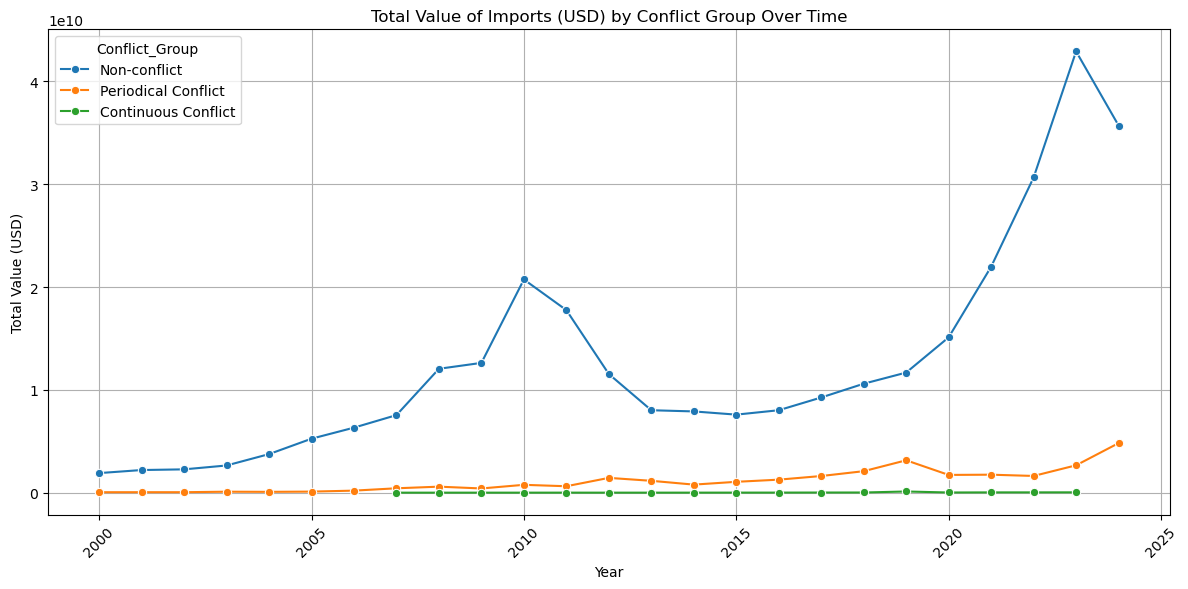

In [ ]:
# Group by year and conflict group and calculate the sum of Value_USD
grouped_data = df.groupby(["Year", "Conflict_Group"])["Value_USD"].sum().reset_index()

# Plotting the line chart
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=grouped_data, x="Year", y="Value_USD", hue="Conflict_Group", marker="o"
)
plt.title("Total Value of Imports (USD) by Conflict Group Over Time")
plt.xlabel("Year")
plt.ylabel("Total Value (USD)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This compares section the compares total the import values total over import time for values countries with over periodical time conflict (e.g., for Ukraine) and countries continuous conflict with (e.g., State periodical)

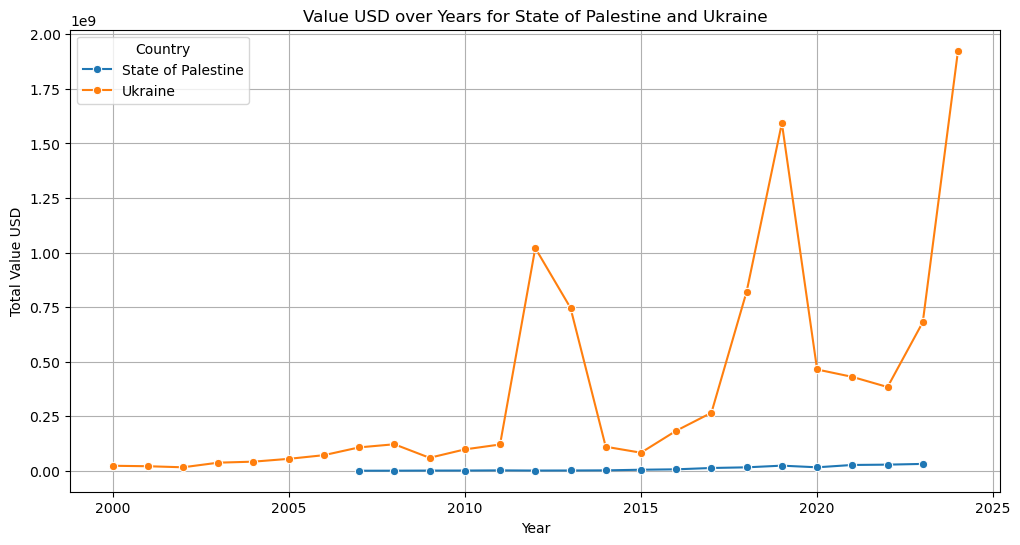

Ukraine conflict years: [2014, 2022, 2023, 2024, 2000]


In [ ]:
# compare periodical conflict "Ukraine" and continuous conflict "state of Palestine  "

import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for State of Palestine and Ukraine
countries_of_interest = ["State of Palestine", "Ukraine"]
filtered_df = df[df["Country"].isin(countries_of_interest)].copy()

# Group by Country, Year and sum the Value_USD
grouped_df = filtered_df.groupby(["Country", "Year"])["Value_USD"].sum().reset_index()


# Plotting the data
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped_df, x="Year", y="Value_USD", hue="Country", marker="o")
plt.title("Value USD over Years for State of Palestine and Ukraine")
plt.xlabel("Year")
plt.ylabel("Total Value USD")
plt.grid(True)
plt.show()


# Get Ukraine conflict years from conflict_years_by_country
ukraine_conflict_years = [
    year
    for year, flag in zip(
        filtered_df[filtered_df["Country"] == "Ukraine"]["Year"].unique(),
        filtered_df[filtered_df["Country"] == "Ukraine"]["Conflict_Year"],
    )
    if flag
]
print("Ukraine conflict years:", ukraine_conflict_years)

Non-Conflict Country with Strong Economy vs. Periodical Conflict Country

After examining countries with continuous conflict, I will now compare a non-conflict country with strong economic conditions to a country experiencing periodical conflict. This comparison aims to highlight how the absence or irregular presence of conflict, combined with economic stability, affects the adoption of solar energy technologies. By analyzing these two contrasting cases, I hope to better understand the role of conflict frequency and economic resilience in shaping renewable energy development.

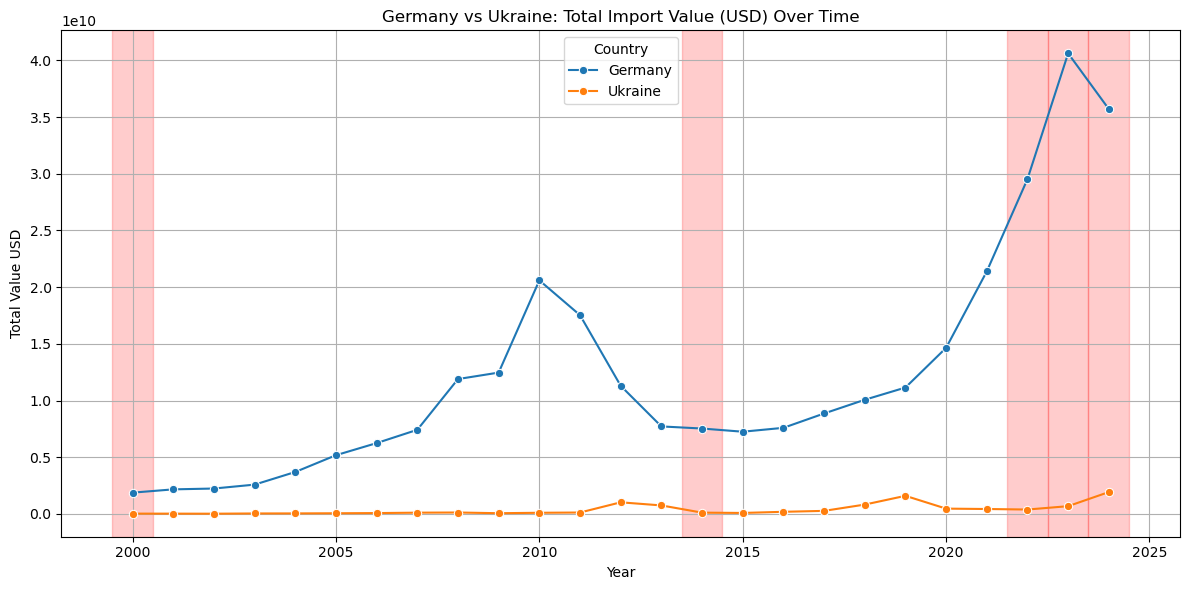

In [ ]:
# Compare Germany (Non-conflict) vs Ukraine (Periodical Conflict)

# Filter data for Germany and Ukraine
countries_compare = ["Germany", "Ukraine"]
compare_df = df[df["Country"].isin(countries_compare)].copy()

# Group by Country and Year, sum Value_USD
compare_grouped = (
    compare_df.groupby(["Country", "Year"])["Value_USD"].sum().reset_index()
)

# Add conflict year marker for Ukraine
compare_grouped["Conflict_Year_Marker"] = compare_grouped.apply(
    lambda row: row["Year"]
    if row["Country"] == "Ukraine"
    and row["Year"]
    in [
        year
        for year, flag in zip(
            compare_df[compare_df["Country"] == "Ukraine"]["Year"].unique(),
            compare_df[compare_df["Country"] == "Ukraine"]["Conflict_Year"],
        )
        if flag
    ]
    else None,
    axis=1,
)

# Plot using matplotlib and seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=compare_grouped, x="Year", y="Value_USD", hue="Country", marker="o")
plt.title("Germany vs Ukraine: Total Import Value (USD) Over Time")
plt.xlabel("Year")
plt.ylabel("Total Value USD")
plt.grid(True)

# Highlight Ukraine's conflict years in red
conflict_years_ukraine = compare_grouped[
    compare_grouped["Conflict_Year_Marker"].notna()
]["Year"].tolist()
for year in conflict_years_ukraine:
    plt.axvspan(year - 0.5, year + 0.5, color="red", alpha=0.2)

plt.tight_layout()
plt.show()

Compare Saudi Arabia (Non-conflict) with stornger economy vs Central African Rep (Periodical Conflict) with un stable economy

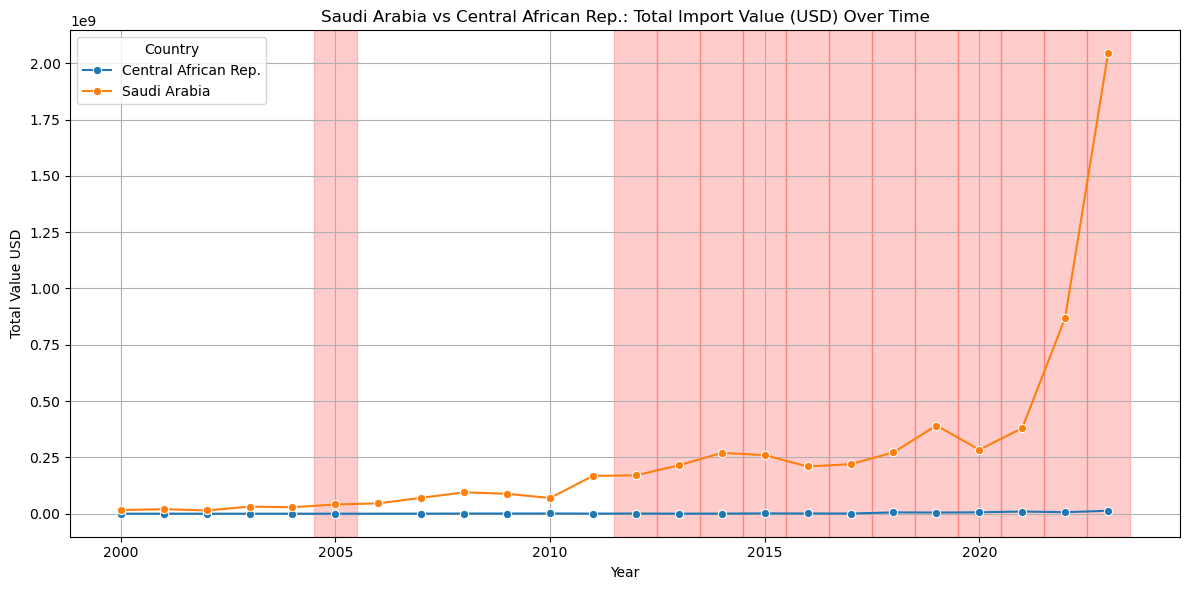

In [ ]:
# Filter data for Saudi Arabia and Central African Rep.
countries_sa_vs_caf = ["Saudi Arabia", "Central African Rep."]
sa_vs_caf_df = df[df["Country"].isin(countries_sa_vs_caf)].copy()

# Group by Country and Year, sum Value_USD
sa_vs_caf_grouped = (
    sa_vs_caf_df.groupby(["Country", "Year"])["Value_USD"].sum().reset_index()
)

# Add conflict year marker for Central African Rep.
sa_vs_caf_grouped["Conflict_Year_Marker"] = sa_vs_caf_grouped.apply(
    lambda row: row["Year"]
    if row["Country"] == "Central African Rep."
    and row["Year"]
    in [
        year
        for year, flag in zip(
            sa_vs_caf_df[sa_vs_caf_df["Country"] == "Central African Rep."][
                "Year"
            ].unique(),
            sa_vs_caf_df[sa_vs_caf_df["Country"] == "Central African Rep."][
                "Conflict_Year"
            ],
        )
        if flag
    ]
    else None,
    axis=1,
)

# Plot using matplotlib and seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=sa_vs_caf_grouped, x="Year", y="Value_USD", hue="Country", marker="o")
plt.title("Saudi Arabia vs Central African Rep.: Total Import Value (USD) Over Time")
plt.xlabel("Year")
plt.ylabel("Total Value USD")
plt.grid(True)

# Highlight Central African Rep.'s conflict years in red
conflict_years_caf = sa_vs_caf_grouped[
    sa_vs_caf_grouped["Conflict_Year_Marker"].notna()
]["Year"].tolist()
for year in conflict_years_caf:
    plt.axvspan(year - 0.5, year + 0.5, color="red", alpha=0.2)

plt.tight_layout()
plt.show()

compare two periodical countries 

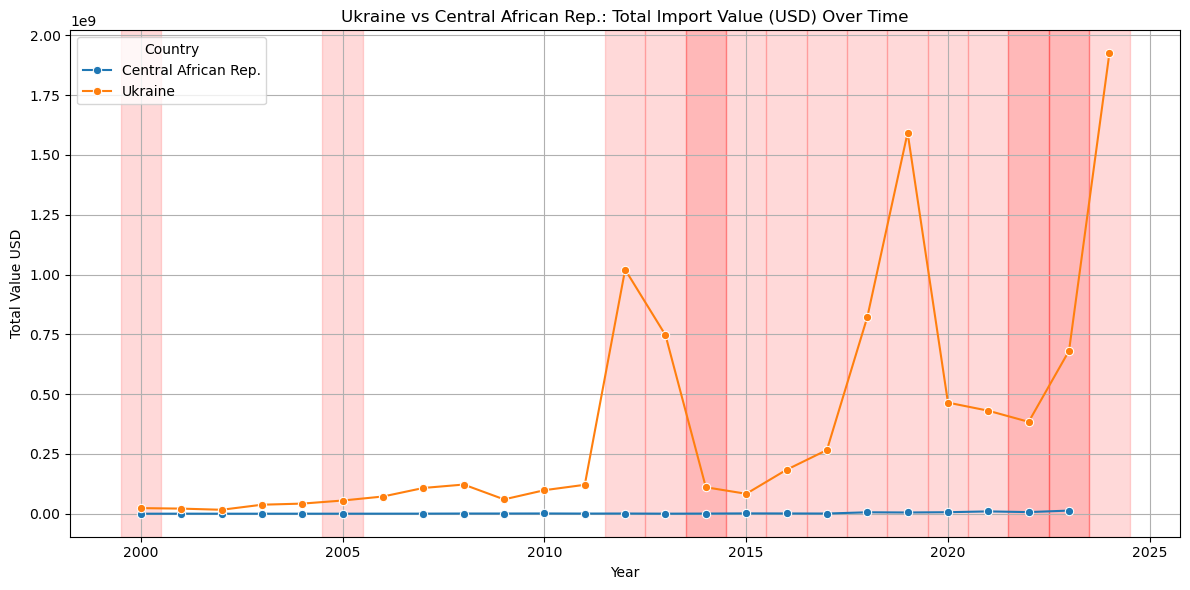

In [ ]:
countries_ukr_car = ["Ukraine", "Central African Rep."]
ukr_car_df = df[df["Country"].isin(countries_ukr_car)].copy()

# Group by Country and Year, sum Value_USD
ukr_car_grouped = (
    ukr_car_df.groupby(["Country", "Year"])["Value_USD"].sum().reset_index()
)


# Add conflict year marker for both countries
def conflict_marker(row):
    if row["Country"] == "Ukraine" and row["Year"] in conflict_years_ukraine:
        return row["Year"]
    if row["Country"] == "Central African Rep." and row["Year"] in conflict_years_caf:
        return row["Year"]
    return None


ukr_car_grouped["Conflict_Year_Marker"] = ukr_car_grouped.apply(conflict_marker, axis=1)

plt.figure(figsize=(12, 6))
sns.lineplot(data=ukr_car_grouped, x="Year", y="Value_USD", hue="Country", marker="o")
plt.title("Ukraine vs Central African Rep.: Total Import Value (USD) Over Time")
plt.xlabel("Year")
plt.ylabel("Total Value USD")
plt.grid(True)

# Highlight conflict years for both countries
for country, conflict_years in zip(
    countries_ukr_car, [conflict_years_ukraine, conflict_years_caf]
):
    for year in conflict_years:
        plt.axvspan(year - 0.5, year + 0.5, color="red", alpha=0.15)

plt.tight_layout()
plt.show()